In [54]:
import json
from queue import Queue
import networkx as nx
import matplotlib.pyplot as plt

In [55]:
# Open the JSON file
with open('dfa.json', 'r',encoding="utf-8") as file:
    # Load JSON data from the file
    data = json.load(file)

print(data)

{'startingState': '0', '0': {'isTerminatingState': False, 'a': ['1']}, '1': {'isTerminatingState': False, 'b': ['2']}, '2': {'isTerminatingState': False, 'b': ['3'], 'c': ['4'], 'd': ['5']}, '3': {'isTerminatingState': False, 'b': ['3'], 'c': ['4'], 'd': ['5']}, '4': {'isTerminatingState': False, 'b': ['3'], 'c': ['4'], 'd': ['5']}, '5': {'isTerminatingState': True, 'd': ['5']}}


In [56]:
all_groups=Queue()
terminating=[]
non_terminating=[]
for state,value in data.items():
    if state=="startingState":continue
    if value.get("isTerminatingState")==True:
        terminating.append(state)
    else:
        non_terminating.append(state)
terminating.sort()
non_terminating.sort()
all_groups.put(terminating)
all_groups.put(non_terminating)
print(terminating)
print(non_terminating)
for el in all_groups.queue:
    print(el)

['5']
['0', '1', '2', '3', '4']
['5']
['0', '1', '2', '3', '4']


In [57]:
all_pos_trans=set()       
for state,value in data.items():
    if state in ["startingState"]:continue
    for trans in value.keys():
        if trans in ["isTerminatingState","ε"]:continue
        all_pos_trans.add(trans)
print(all_pos_trans)


{'d', 'b', 'c', 'a'}


In [58]:
def get_destination_group(state):
    for group in all_groups.queue:
        if state in group:
            return group
    return [None]
print(all_groups.queue)
print(tuple(get_destination_group("f")))

deque([['5'], ['0', '1', '2', '3', '4']])
(None,)


In [59]:
count=0
to_stop=0
print(all_groups.queue)
# for group in all_groups.queue:
while not all_groups.empty():
    print(all_groups.queue)
    if count ==all_groups.qsize():
        break
    state_newGroup=[]
    new_groups=set()
    split=False
    
    group=all_groups.get()
   
    if len(group)<=1:
        count+=1
        all_groups.put(group)
        continue

    break_for_split=False
    #for each poss trans
    for poss_trans in all_pos_trans:
        if break_for_split==True:
            break
        dest_group_stand=None
        state_newGroup=[]
        for state in group:  
            #if state does not have this trans --->[]
            if poss_trans not in data.get(state).keys():
                dest_group=[]
                
            #if state does have this trans            
            else:
                #if group exists----->group
                #if same groupe----->[none]
                dest_state =data.get(state).get(poss_trans)[0]  
                dest_group=get_destination_group(dest_state)
                
            #there is a destination available and not me
            state_newGroup.append((state,tuple(dest_group)))
            new_groups.add(tuple(dest_group))
            if dest_group_stand==None:
                dest_group_stand=tuple(dest_group)
            elif dest_group_stand!=tuple(dest_group):
                split=True
                count=0
                        
 
        # if split==False:#no split in the group
        #     count+=1
        #     # print("bef ",all_groups.queue)
        #     all_groups.put(group)
        #     # print("aft ",all_groups.queue)

        # if there is a split so we need to redo the loop
        if split==True:
            count=0
            
            # print(group)
            #adjust groups in loop
            for newGroup in new_groups:
                # print("new group ",newGroup)
                arr=[]
                for stat in group:
                    # print("stat ",stat)
                    if (stat,newGroup) in state_newGroup:#this state goes to this new grouping
                        arr.append(stat)
                        
                arr.sort()
                # print("allbef",all_groups.queue)
                if arr not in all_groups.queue and len(arr)>0: #
                    all_groups.put(arr)
                # print("allaf",all_groups.queue)
            break_for_split=True

    if break_for_split==False:
        count+=1
        all_groups.put(group)
           




print(all_groups.queue)


deque([['5'], ['0', '1', '2', '3', '4']])
deque([['5'], ['0', '1', '2', '3', '4']])
deque([['0', '1', '2', '3', '4'], ['5']])
deque([['5'], ['2', '3', '4'], ['0', '1']])
deque([['2', '3', '4'], ['0', '1'], ['5']])
deque([['0', '1'], ['5'], ['2', '3', '4']])
deque([['5'], ['2', '3', '4'], ['1'], ['0']])
deque([['2', '3', '4'], ['1'], ['0'], ['5']])
deque([['1'], ['0'], ['5'], ['2', '3', '4']])
deque([['0'], ['5'], ['2', '3', '4'], ['1']])
deque([['5'], ['2', '3', '4'], ['1'], ['0']])
deque([['5'], ['2', '3', '4'], ['1'], ['0']])


In [60]:
def is_terminal(group):
    for state in group:
        if state in terminating:
            return True
    return False

In [61]:
def get_new_group(stat):
    for group in all_groups.queue:
        if stat in group:
            return group

In [62]:
data2=data.copy()
refrence_dic={}
for grouping in all_groups.queue:

    for state in grouping:
      refrence_dic[state]=grouping[0]

print(refrence_dic)
print(all_groups.queue)

{'5': '5', '2': '2', '3': '2', '4': '2', '1': '1', '0': '0'}
deque([['5'], ['2', '3', '4'], ['1'], ['0']])


In [72]:

min_dfa={}
for key , val in data.items():
      if key =="startingState":continue
      min_dfa[refrence_dic[key]]={
         "isTerminatingState":is_terminal(get_new_group(key)),        
      } 
      for trans,dests in val.items():
         if trans=="isTerminatingState":continue
         min_dfa[refrence_dic[key]][trans]=refrence_dic[dests[0]]
 
print(min_dfa)
with open("dfa_min.json", "w") as json_file:
    json.dump(min_dfa, json_file, indent=4)


{'0': {'isTerminatingState': False, 'a': '1'}, '1': {'isTerminatingState': False, 'b': '2'}, '2': {'isTerminatingState': False, 'b': '2', 'c': '2', 'd': '5'}, '5': {'isTerminatingState': True, 'd': '5'}}


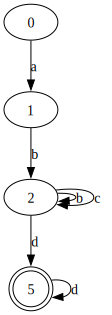

In [74]:
# Create a new Digraph object
from graphviz import Digraph



dot = Digraph()
for node in min_dfa.keys():
    if min_dfa[node]["isTerminatingState"]==True:
       
        dot.node(str(node), shape= "doublecircle")
    else:
        dot.node(str(node))


for state,value in min_dfa.items():
  
    for a_trans,dest in value.items():
        if a_trans=="isTerminatingState":continue
        
        
        dot.edge(state,dest,label=a_trans)
        # if value == dest:
        #     dot.edge(value, value, label=a_trans + " (self-loop)")


# Render the graph into an image file
dot.render('min_graph_from_array', format='png', cleanup=True)

# # Display the graph
dot
